In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [ ]:
# u_tt = c^2*u_xx + F(x,t)     ,c^2 = T0/r0
# u(x,0) = phi1
# u_t(x,0) = phi2
# a1*u_x(0,t) + b1*u(0,t) = g1
# a2*u_x(l,t) + b2*u(l,t) = g2

F = lambda x, t: 1/8*np.exp(x+t)
c = 1/np.sqrt(2)
solution  = lambda x, t: 1/4*np.exp(x+t)  

START_x = 0
FINISH_x = 1
START_t = 0
FINISH_t = 1

# начальные условия
phi1 = lambda x: 1/4*np.exp(x) 
phi2 = lambda x: 1/4*np.exp(x)  
div2_phi1 = lambda x: 1/4*np.exp(x) 
# граничные условия
a1 = -1 
a2 = -1 
b1 = 2 
b2 = 3 
g1 = lambda t: 1/4*np.exp(t) 
g2 = lambda t: 1/2*np.exp(1+t)
# задаем шаги сетки
h = 0.01
t = 0.005
N_h = int((FINISH_x-START_x)//h)+2
M_t = int((FINISH_t-START_t)//t)+2

# сетка
start_xk = np.linspace(START_x, FINISH_x, N_h)
start_tn = np.arange(START_t,FINISH_t,t)

## 1 порядка точности

In [ ]:
# Явная разностная схема типа 'крест'

def three_rows_1order(start_x,h,t):
  start_t = np.arange(START_t,FINISH_t+t,t)
  u = np.zeros((3,len(start_x)))
# начальные точки
  u[0] = phi1(start_x)
  u[1] = phi2(start_x)*t + phi1(start_x) 
      
# основные точки
  for j in range(2, len(start_t)):
    for i in range(1,len(start_x)-1):
      u[2][i] = (c*t/h)**2*( u[1,i+1] - 2*u[1,i] + u[1,i-1] ) + t**2*F(h*i,t*(j-1)) + 2*u[1,i] - u[0,i]

# граничные точки
    u[2][0] = (g1(start_t[j]) - a1*u[2,1]/h) / (b1 - a1/h) 
    u[2][-1] = (g2(start_t[j]) + a2*u[2,-2]/h) / (b2 + a2/h) 

    u[0] = [elem for elem in u[1]]
    u[1] = [elem for elem in u[2]]
  return u[2]

In [ ]:
u_solution = np.zeros(N_h)
for i in range(len(start_xk)):
  u_solution[i] = solution(start_xk[i],start_tn[-1])

u1 = three_rows_1order(start_xk,h,t)
for i in range(N_h):
    diff1 = [abs(u_solution[i] - u1[i]) for i in range(len(start_xk))] 

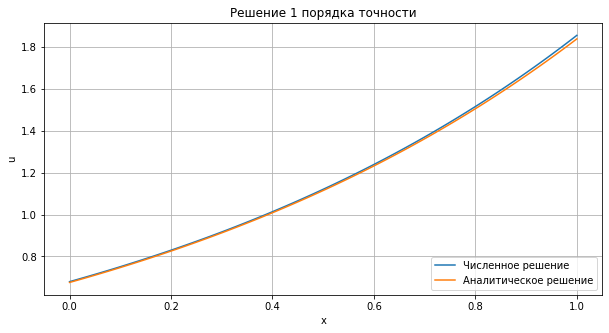

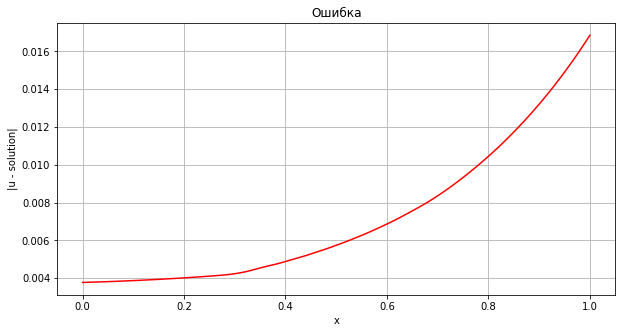

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Решение 1 порядка точности")
plt.grid()
plt.xlabel("x")
plt.ylabel("u")
plt.plot(start_xk, u1,label="Численное решение")
plt.plot(start_xk, u_solution,label="Аналитическое решение")
plt.legend(loc='lower right')

plt.figure(figsize=(10,5))
plt.title("Ошибка")
plt.xlabel("x")
plt.ylabel("|u - solution|")
plt.grid()
plt.plot(start_xk, diff1,color='red')

## 2 порядка точности

In [ ]:
def three_rows_2order(start_x,h,t):
  start_t = np.arange(START_t,FINISH_t,t)
  u2 = np.zeros((3,len(start_x)))

  u2[0] = phi1(start_x)
  u2[1] = u2[0] + t * phi2(start_x) + t**2 / 2 * (c**2 * div2_phi1(start_x) + F(start_x, 0))


  for i in range(2, len(start_t)):
        for k in range(1, len(start_x) - 1):
            u2[2][k] = 0.5*( t / h) ** 2 * (u2[1][k + 1] - 2 * u2[1][k] + u2[1][k - 1]) + t ** 2 * F(k*h, t*i-t) + 2 * u2[1][k] - u2[0][k]

        u2[2][0] = 2*0.5*(t / h) ** 2 *(u2[1][1] -(1 - h*b1/a1)*u2[1][0] - h/a1 * g1(i*t-t)) + 2*u2[1][0] - u2[0][0] + t**2*F(0, t*i-t)
        u2[2][-1] = 2*0.5*(t / h) ** 2 *(u2[1][-2] -(1 + h*b2/a2)*u2[1][-1] + h/a2 * g2(i*t-t)) + 2*u2[1][-1] - u2[0][-1] + t**2*F(start_x[-1], t*i-t)

        u2[0] = [u2[1][k] for k in range(len(u2[0]))]
        u2[1] = [u2[2][k] for k in range(len(u2[0]))]

  return u2[-1]

In [ ]:
u2 = three_rows_2order(start_xk,h,t)
for i in range(N_h):
    diff2 = [abs(u_solution[i] - u2[i]) for i in range(len(start_xk))] 

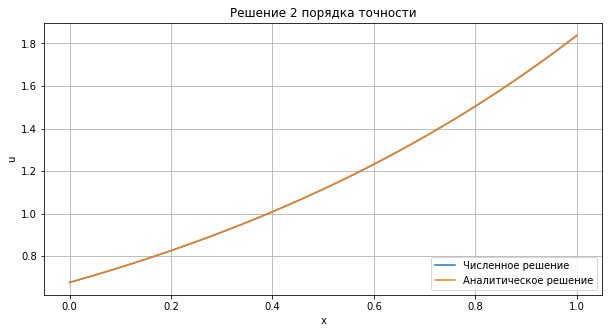

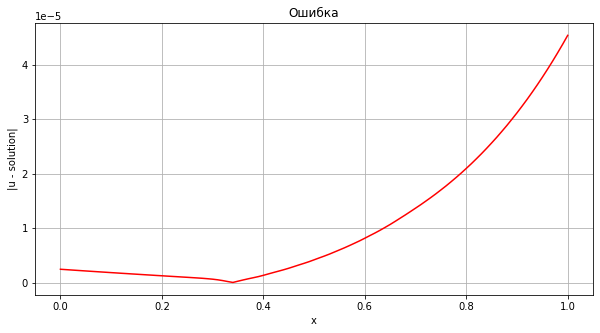

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Решение 2 порядка точности")
plt.grid()
plt.xlabel("x")
plt.ylabel("u")
plt.plot(start_xk, u2,label="Численное решение")
plt.plot(start_xk, u_solution,label="Аналитическое решение")
plt.legend(loc='lower right')

plt.figure(figsize=(10,5))
plt.title("Ошибка")
plt.xlabel("x")
plt.ylabel("|u - solution|")
plt.grid()
plt.plot(start_xk, diff2,color='red')

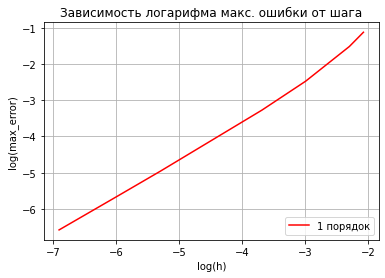

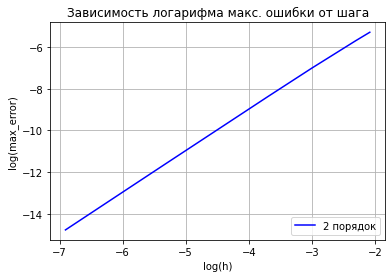

In [ ]:
hrange =  [0.001, 0.0025 ,0.005, 0.025, 0.05, 0.1,  0.125 ]
# hrange = np.arange(0.025,0.125,0.025)

error_1 = np.zeros(len(hrange))
error_2 = np.zeros(len(hrange))

for i in range(len(hrange)):
    hi = hrange[i]
    t = hi/5
    xk_h = np.arange(START_x,FINISH_x+hi,hi)
    tn_h = np.arange(START_t,FINISH_t,t)
    yreal = [0] * len(xk_h)
    for k in range(len(xk_h)):
        yreal[k] = solution(xk_h[k], tn_h[-1])
    
    
    trange = np.arange(START_t,FINISH_t,t)
    ypol_ord1 = three_rows_1order(xk_h, hi, t)
    ypol_ord2 = three_rows_2order(xk_h, hi, t)
    error_1[i] = np.log(max([abs(ypol_ord1[j] - yreal[j]) for j in range(len(yreal))]))
    error_2[i] = np.log(max([abs(ypol_ord2[j] - yreal[j]) for j in range(len(yreal))]))

plt.figure()
plt.title("Зависимость логарифма макс. ошибки от шага")
plt.xlabel("log(h)")
plt.ylabel("log(max_error)")
plt.grid()
plt.plot(np.log(hrange), error_1, color='red', label='1 порядок')
plt.legend(loc='lower right')

plt.figure()
plt.title("Зависимость логарифма макс. ошибки от шага")
plt.xlabel("log(h)")
plt.ylabel("log(max_error)")
plt.grid()
plt.plot(np.log(hrange), error_2, color='blue', label='2 порядок')
plt.legend(loc='lower right')
# по графику видно, что теоретическая точность подтверждается